In [14]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

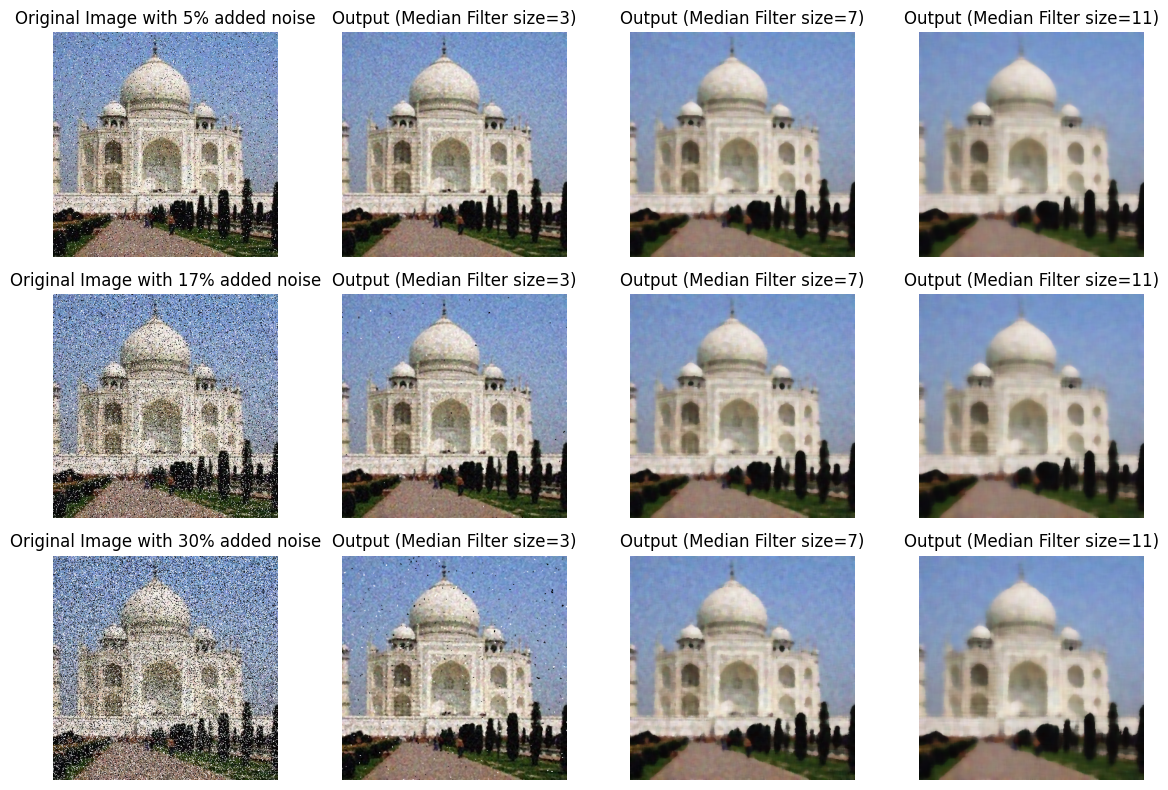

In [18]:
def add_noise(im, prop_noise):
    n = int(im.width * im.height * prop_noise)
    x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height, n)
    for x, y in zip(x, y):
        im.putpixel((x, y), ((0, 0, 0) if np.random.rand() < 0.5 else (255, 255, 255)))
    return im


original_im = Image.open("Picture1.jpg")

fig, axs = plt.subplots(3, 4, figsize=(12, 8))

for i, prop_noise in enumerate(np.linspace(0.05, 0.3, 3), start=1):
    im = add_noise(original_im.copy(), prop_noise)
    im.save(f"scene{prop_noise}.jpg")
    axs[i - 1, 0].imshow(im)
    axs[i - 1, 0].set_title(f"Original Image with {int(100 * prop_noise)}% added noise")
    axs[i - 1, 0].axis("off")

    for sz_idx, sz in enumerate([3, 7, 11], start=1):
        im1 = im.filter(ImageFilter.MedianFilter(size=sz))
        axs[i - 1, sz_idx].imshow(im1)
        axs[i - 1, sz_idx].set_title(f"Output (Median Filter size={sz})")
        axs[i - 1, sz_idx].axis("off")

plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()